In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('F:A-Software Development Tools & Tutorials/Development -Tutorials/The Data Science Course 2019 Complete Data Science Bootcamp/38. Advanced Statistical Methods - K-Means Clustering/3.2 Countries_exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


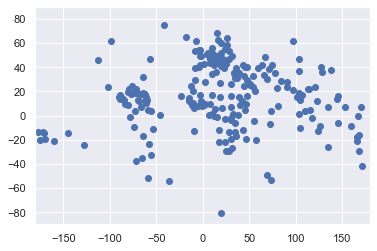

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [4]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [5]:
kmeans = KMeans(3)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1])

In [8]:
data_with_cluster = data.copy()
data_with_cluster['cluster'] = identified_cluster
data_with_cluster

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


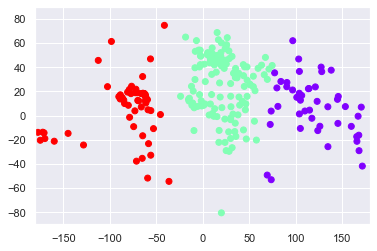

In [9]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [10]:
kmeans.inertia_

325235.52237055893

In [11]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [12]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192367.53037794493,
 151536.30336760037]

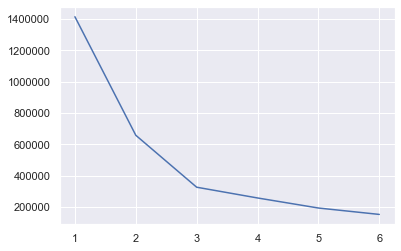

In [13]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)